In [28]:
# 读取图像
import cv2
import matplotlib.pyplot as plt
from function_gray import *

imgname = r".\test_images\Fig0940(a)(rice_image_with_intensity_gradient).tif"
img = cv2.imread(imgname)[:, :, 0]


# 使用 Otsu's 方法自动寻找全局阈值
_, binary_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# 创建半径为2的平坦圆盘结构元
kernel = create_flat_disk_se(40)
print(kernel)

img_opening = opening(img, kernel)

img_tophat = img-img_opening

_,thresholded_tophat_image =  cv2.threshold(img_tophat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# 假设 img、img_tophat、img_eroded 和 img_dilated 是已经定义的图像数据
# 这里将创建四个子图，显示四张不同的图像

# 绘制图像
fig, ax = plt.subplots(2, 2, figsize=(10, 5))  # 创建2行2列的子图

images = [binary_image, img_tophat, img_opening,thresholded_tophat_image]  # 将四张图像放入列表
titles = ['Binary Image', 'Tophat Image', 'Opening Image', 'Thresholded Tophat Image']  # 标题列表

for i in range(4):
    ax[i//2, i%2].imshow(images[i], cmap='gray')
    ax[i//2, i%2].set_title(titles[i])
    ax[i//2, i%2].axis('off')  # 关闭坐标轴

plt.tight_layout()  # 自动调整子图参数以给出合适的填充
# 保存图表

plt.savefig(f"./result/rice_image.png", bbox_inches='tight')  # 保存图像，使用 bbox_inches='tight' 可以避免边距问题
plt.show()




[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


KeyboardInterrupt: 

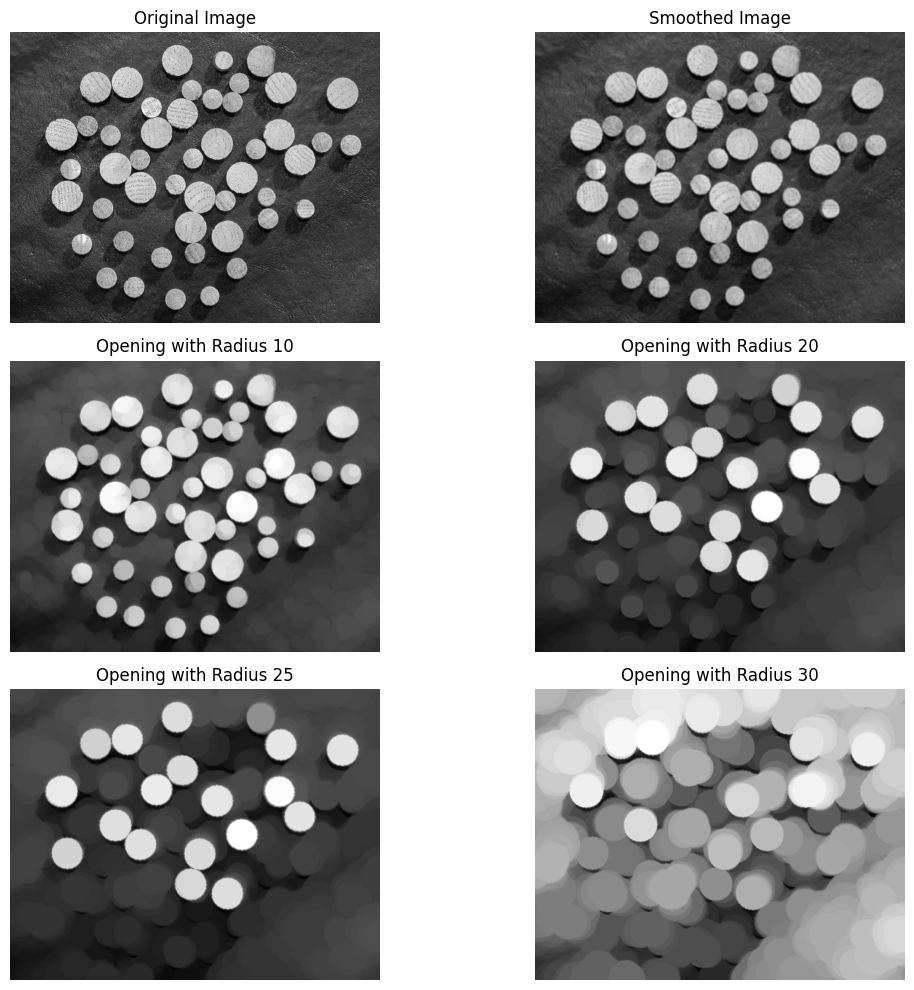

In [29]:
#粒度检测
imgname = r".\test_images\Fig0941(a)(wood_dowels).tif"
img = cv2.imread(imgname)[:, :, 0]

radius = [10, 20,25, 30]
kernel = [create_flat_disk_se(r) for r in radius]

smoothed_img = cv2.GaussianBlur(img, (5, 5), 0)  # (5, 5) 是高斯核的大小，0 是标准差

opening_imgs = []

for i, k in enumerate(kernel):
    opening_img = opening(smoothed_img, k)
    opening_imgs.append(opening_img)

plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)

plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')  # 不显示坐标轴
# 平滑图
plt.subplot(3, 2, 2)

plt.title('Smoothed Image')
plt.imshow(smoothed_img, cmap='gray')
plt.axis('off')

# 开操作结果
for i, opening_img in enumerate(opening_imgs):
    plt.subplot(3, 2, i + 3)  # 跳到第3行的相应位置
    plt.imshow(opening_img, cmap='gray')  # 使用灰度图显示开操作结果
    plt.title(f'Opening with Radius {radius[i]}')
    plt.axis('off')

# 调整布局
plt.tight_layout()
plt.savefig(f"./result/wood_dowels.png", bbox_inches='tight')  # 保存图像，使用 bbox_inches='tight' 可以避免边距问题
plt.show()

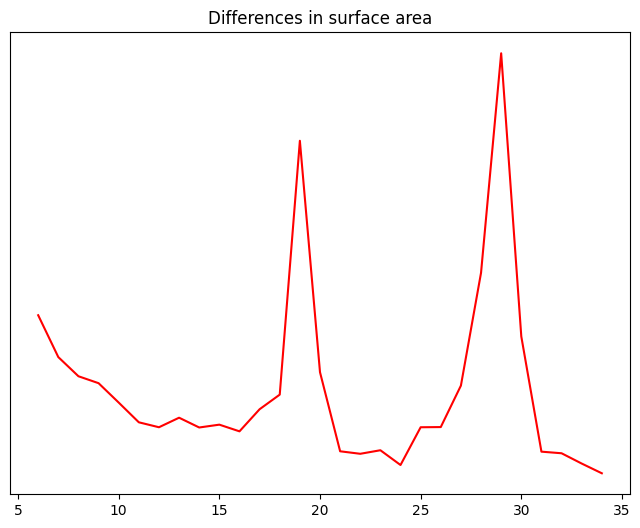

In [30]:
maxSize = 35
deltaSurfaceArea = np.zeros(maxSize)
SurfaceArea = np.zeros(maxSize)
for r in range(1, maxSize):
    se = create_flat_disk_se(r)  # 圆形结构元
    imgOpen = opening(img, se)  # 开运算
    SurfaceArea[r] = imgOpen.sum()
    deltaSurfaceArea[r] = SurfaceArea[r-1] - SurfaceArea[r]
    # print(r, sumSurf[r], deltaSum[r])



plt.figure(figsize=(8, 6))
plt.plot(range(6, maxSize), deltaSurfaceArea[6:], 'r', label='Differences in surface area')  
plt.title("Differences in surface area")
plt.yticks([])
plt.savefig(f"./result/Delta_of_surface_area.png", bbox_inches='tight') 
plt.show()  


In [ ]:
# 读取图像
import cv2
import matplotlib.pyplot as plt
from function_gray import *

imgname = r".\test_images\Fig0943(a)(dark_blobs_on_light_background).tif"
img = cv2.imread(imgname)[:, :, 0]

se = create_flat_disk_se(20)

closed_img = closing(img,create_flat_disk_se(30))
opende_img = opening(closed_img,create_flat_disk_se(60))


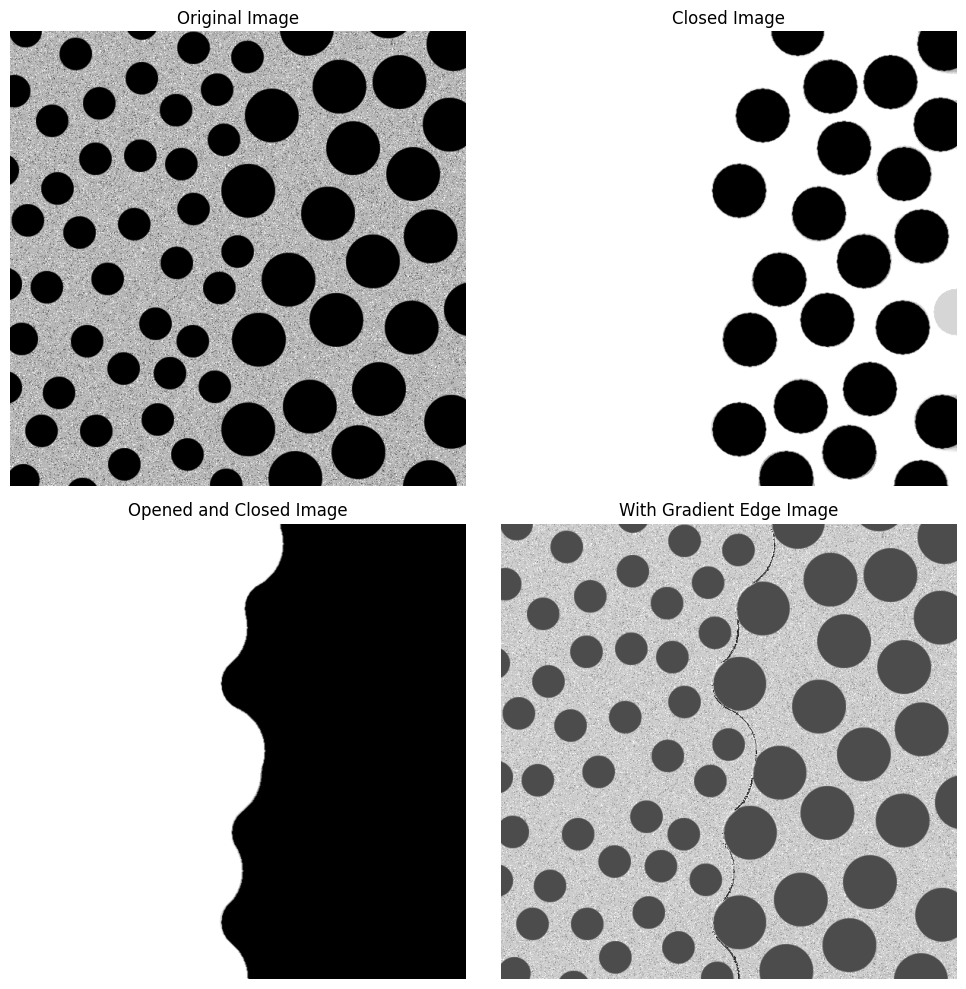

In [18]:

kernel = np.ones((2,2),np.uint8)
gradient_img =(dilate(opende_img, kernel) - erode(opende_img, kernel))

result = img + gradient_img

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray') 
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(closed_img,cmap='gray') 
plt.title('Closed Image')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(opende_img,cmap='gray') 
plt.title('Opened and Closed Image')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(result,cmap='gray') 
plt.title('With Gradient Edge Image')
plt.axis('off')

# 调整布局
plt.tight_layout()
plt.savefig(f"./result/dark_blobs_on_light_background.png", bbox_inches='tight')  # 保存图像，使用 bbox_inches='tight' 可以避免边距问题
plt.show()  

[ 51  79  49 ... 152  96  16]


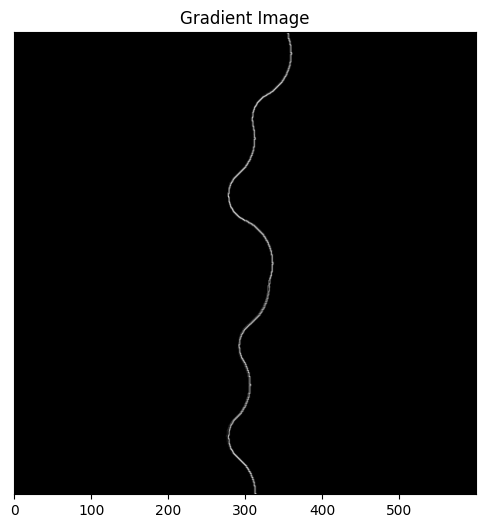

In [17]:
kernel = np.ones((2,2),np.uint8)
gradient_img =dilate(opende_img, kernel) - erode(opende_img, kernel)
print(gradient_img[gradient_img > 0])
plt.figure(figsize=(8, 6))
plt.imshow(gradient_img,cmap='gray') 
plt.title("Gradient Image")
plt.yticks([])
plt.show()  